C:\Users\jundo\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
C:\Users\jundo\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.


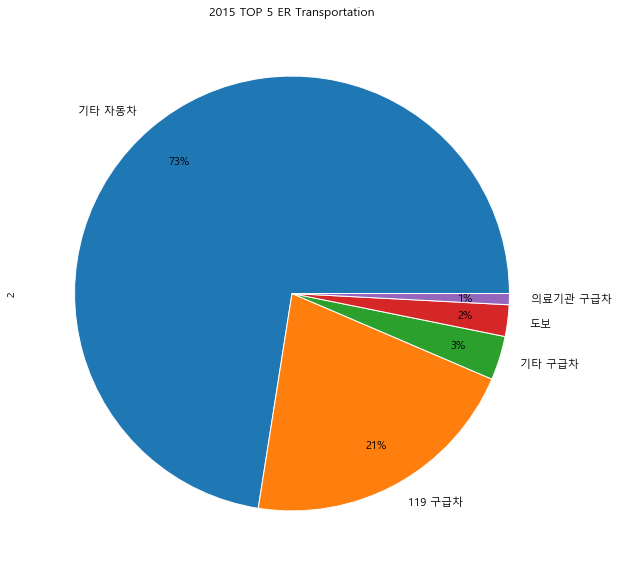

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc


def get_top_5_15(df_trans_15):
    
    # Rename all col's name
    df_trans_15.rename(columns = {'응급.1': '119 구급차', '응급.2': '의료기관 구급차',
                                  '응급.3':'기타 구급차', '응급.4':'경찰차등 공공차량',
                                  '응급.5':'항공이송', '응급.6':'기타 자동차', '응급.7':'도보', '응급.8':'기타'}, inplace = True)
    # Delete unnecessary cols
    del df_trans_15['응급']
    del df_trans_15['미상/미입력']
    del df_trans_15['비응급']
    del df_trans_15['기간']
    del df_trans_15['성별']
    del df_trans_15['연령별']
    del df_trans_15['응급.9']
    del df_trans_15['계']
    # Drop unnecessary row
    df_trans_15 = df_trans_15.drop([0])
    # Replace all values string to int
    for i in df_trans_15.columns:
        df_trans_15[i] = df_trans_15[i].apply(lambda x : int(x.replace(',','')))
    # sort by most used transportation
    df_top5 = df_trans_15.sort_values(by=1, axis=1, ascending=False)
    # extract top5 transportation as series
    top5_series_15 =  df_top5.iloc[1, 0:5]
    
    return top5_series_15


# matplotlib의 한글문제를 해결
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
# font_name
rc('font', family=font_name)

# Open txt file
df_trans_15 = pd.read_table('응급실 내원수단 현황 통계2015년.txt')
df_trans_19 = pd.read_table('응급실 내원수단 현황 통계2019년.txt')

top5_result_15 = get_top_5_15(df_trans_15)
top5_result_15.plot(kind = 'pie', figsize = (10,10), fontsize = 11, title = '2015 TOP 5 ER Transportation',
                        startangle = 0, autopct='%1.0f%%', pctdistance=0.8, labeldistance=1.1,
                        wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })


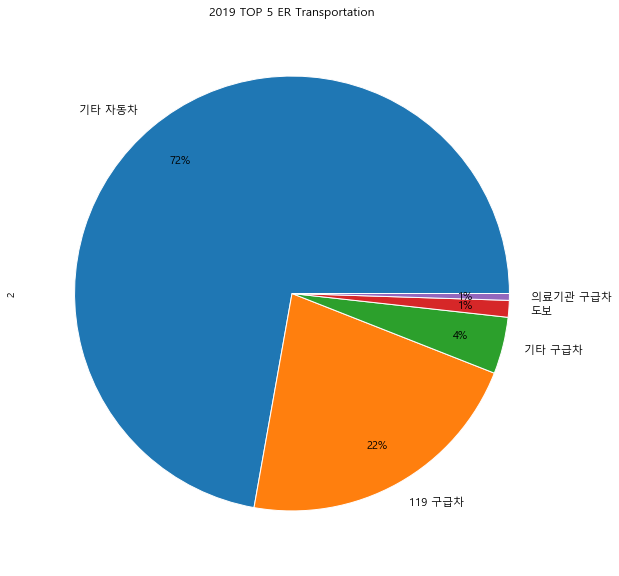

In [2]:
def get_top_5_19(df_trans_19):
    
    # Rename all col's name
    df_trans_19.rename(columns = {'계': '합계', '응급.1': '119 구급차', '응급.2': '의료기관 구급차',
                                  '응급.3':'기타 구급차', '응급.4':'경찰차등 공공차량',
                                  '응급.5':'항공이송', '응급.6':'기타 자동차', '응급.7':'도보',
                                  '응급.8':'기타', '응급.9':'미상/미입력'}, inplace = True)
    # Delete unnecessary cols
    del df_trans_19['응급']
    del df_trans_19['미상/미입력']
    del df_trans_19['비응급']
    del df_trans_19['기간']
    del df_trans_19['성별']
    del df_trans_19['연령별']
    del df_trans_19['합계']
    # Drop unnecessary rows
    df_trans_19 = df_trans_19.drop([0,34,35,36])
    # Replace all values string to int
    for i in df_trans_19.columns:
        df_trans_19[i] = df_trans_19[i].apply(lambda x : int(x.replace(',','')))
    # sort by most used transportation
    df_top5 = df_trans_19.sort_values(by=1, axis=1, ascending=False)
    # extract top5 transportation as series
    top5_series_19 =  df_top5.iloc[1, 0:5]
    
    return top5_series_19

top5_result_19 = get_top_5_19(df_trans_19)
top5_result_19.plot(kind = 'pie', figsize = (10,10), fontsize = 11, title = '2019 TOP 5 ER Transportation',
                        startangle = 0, autopct='%1.0f%%', pctdistance=0.8, labeldistance=1.1,
                        wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })


In [ ]:
'''
처음 받은 파일에서는 성별과 나이별로 응급수단을 나눠져 있지만 성별이 다르다고 나이가 다르다고
특정한 교통수단을 더 많이 타고 적게 탈 수 있는것이 아니라고 생각하여 모두 제외함.

2015년과 2019년의 응급실 교통수단을 비교하였을떄 TOP 5를 제외한 나머지는 다른 교통수단은 TOP 5에 비하여
차이가 희미하여 파이 그래프에 percentage를 더하여 TOP 5 교통수단만을 시각화를 하였음

그래프를 보았을떄 기타 자동차(자가용)이 확실히 많은 것 이 나타나짐.
미미하지만 기타 자동차(73% -> 72%)를 이용하는 수치가 낮아지고 119 구급차(21% -> 22%), 기타 구급차(3% -> 4%) 
이용빈도를 통하여 구급차를 이용하는 하는 사람이 늘어나고 자가용을 타는 사람들이 줄어드는것을 보아
2015년에 비하여 2019년 서울 의료 응급수단이 발전 한 것을 볼 수 있음.
또한, 도보(2% -> 1%) 보았을떄 사람들이 더 빨리 응급실에 갈 수 있음을 예측할 수 있다.
'''